# 🧠 Health Cost Forecaster AI — Predicting Insurance Charges

This project aims to forecast **medical insurance charges** using customer profile data.  
We'll use a regression model to estimate charges based on age, BMI, smoking status, and more.


 **Goal**: Help insurance companies predict risk and set personalized premiums using machine learning.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

**Load Dataset**

In [2]:
# Load the insurance dataset
df = pd.read_csv('insurance.csv')

# Preview data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  Dataset Features

- **age**: Age of the primary beneficiary
- **sex**: Gender
- **bmi**: Body Mass Index
- **children**: Number of children covered by insurance
- **smoker**: Whether the person smokes
- **region**: Residential area in the US
- **charges**: Total medical charges (Target Variable)

**Data Cleaning & Encoding**

In [3]:
# Check for missing values
print(df.isnull().sum())

# Label encode categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

# One-hot encode region
df = pd.get_dummies(df, columns=['region'], drop_first=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**Exploratory Data Analysis (EDA)**

C:\Users\Global\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


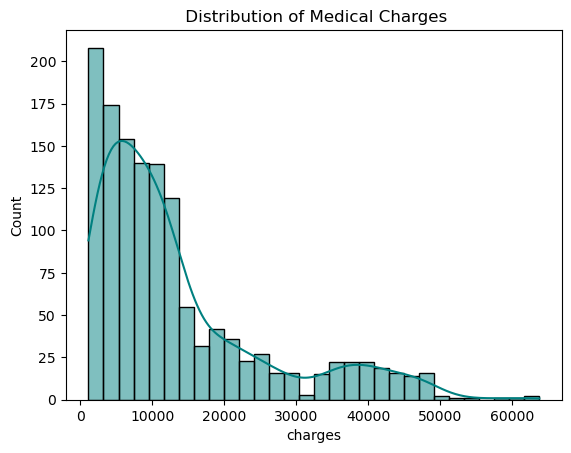

In [4]:
# Plot distribution of charges
sns.histplot(df['charges'], bins=30, kde=True, color='teal')
plt.title(" Distribution of Medical Charges")
plt.show()

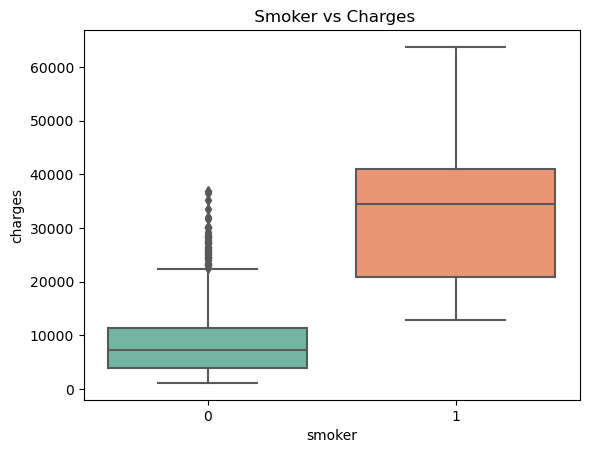

In [5]:
# Boxplot: Charges vs Smoker
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title(" Smoker vs Charges")
plt.show()

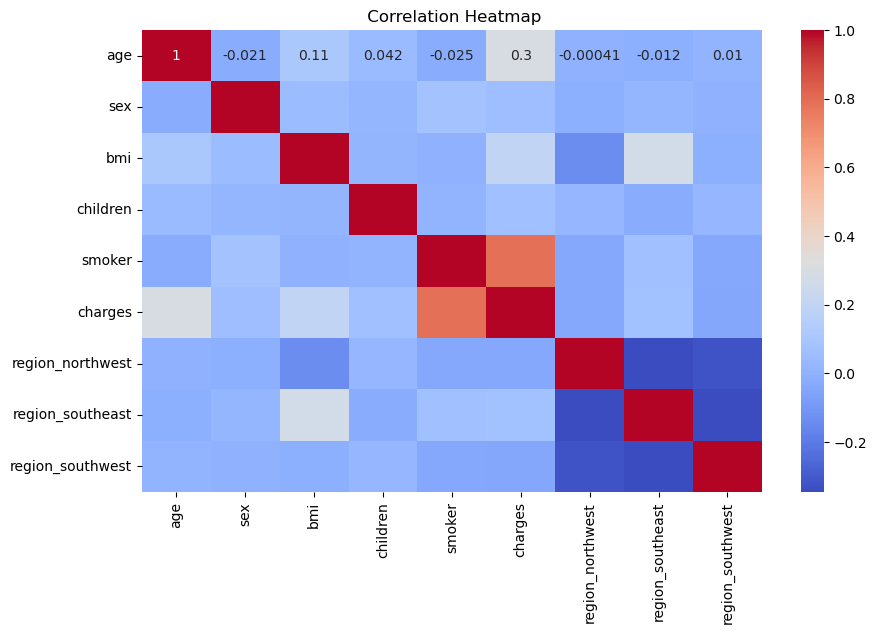

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap")
plt.show()

## Feature Selection

We keep:
- **age**, **bmi**, **children**, **sex**, **smoker**
- One-hot encoded **region**

**Model Building — Linear Regression**

In [7]:
# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluate Model**

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" MAE:", mae)
print(" RMSE:", rmse)
print(" R² Score:", r2)

 MAE: 4181.1944737536505
 RMSE: 5796.284659276273
 R² Score: 0.7835929767120724


**Actual vs Predicted Plot**

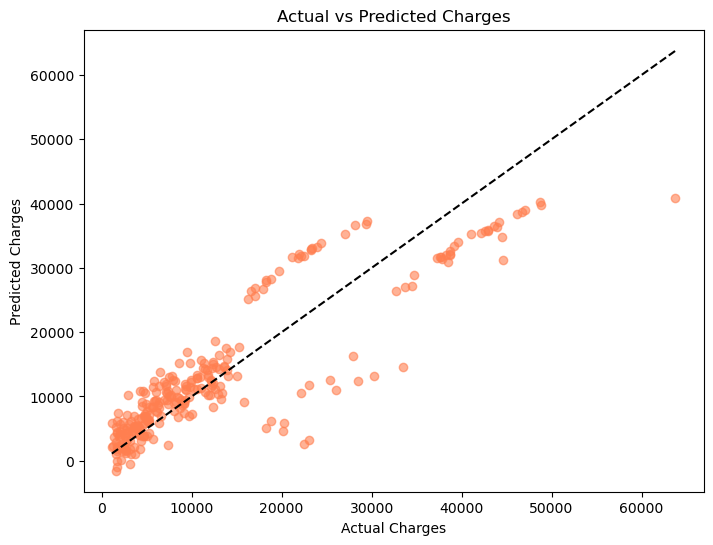

In [11]:
# Compare predictions
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='coral')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.show()

##  Conclusion

- The model performs well for most customers, with an R² of approximately **78%**
- **Smoker**, **BMI**, and **Age** are top predictors of medical cost
- Could be expanded with more lifestyle data for deeper accuracy